In [45]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

#import helpers_05_08 # A set of visualization helpers from PDSH text

from sklearn.datasets import make_blobs


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier

from sklearn.datasets import load_digits


In [2]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: autogenes 1.0.4 has a non-standard dependency specifier matplotlib>=3.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of autogenes or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [25]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_coimbra = fetch_ucirepo(id=451) 
  
# data (as pandas dataframes) 
X = breast_cancer_coimbra.data.features 
y = breast_cancer_coimbra.data.targets 
  
# metadata 
#print(breast_cancer_coimbra.metadata) 
  
# variable information 

#print(breast_cancer_coimbra.variables) 


In [26]:
y = y.replace({1: 0, 2: 1})
y = y.to_numpy()
y = y.ravel()


Text(0.5, 1.0, 'Correlation Heatmap')

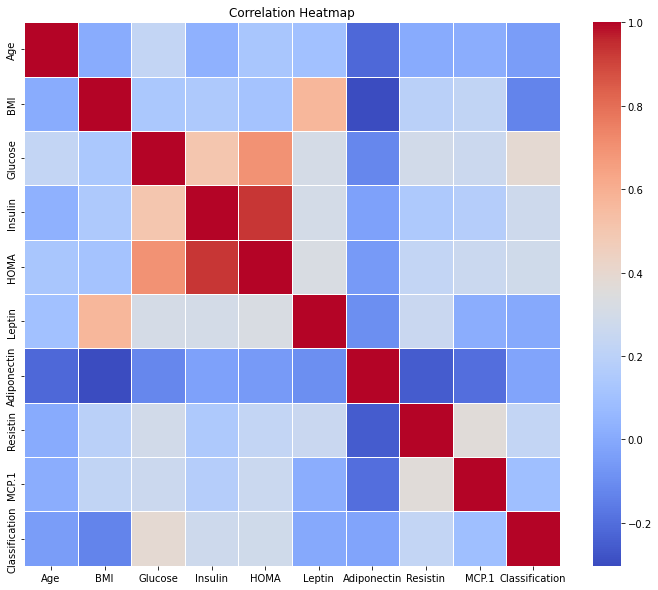

In [27]:
#exploratory data analysis - correlation heatmap for all variables



features = breast_cancer_coimbra.data.features
targets = breast_cancer_coimbra.data.targets

# Concatenate features and targets along columns
bc = pd.concat([features, targets], axis=1)
#correlation matrix
corr_matrix = bc.corr()

plt.figure(figsize=(12, 10))

#heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=175, max_depth=50, min_samples_split=5)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [35]:

print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.76      0.72      0.74        18

    accuracy                           0.69        29
   macro avg       0.67      0.68      0.68        29
weighted avg       0.70      0.69      0.69        29



In [36]:
test_X = X[['Resistin', 'Glucose', 'Age', 'BMI']]

In [43]:
Xtrain, Xtest, ytrain, ytest = train_test_split(test_X, y,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=175, max_depth=50, min_samples_split=10)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

NameError: name 'entropy' is not defined

In [42]:
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.82      0.78      0.80        18

    accuracy                           0.76        29
   macro avg       0.75      0.75      0.75        29
weighted avg       0.76      0.76      0.76        29



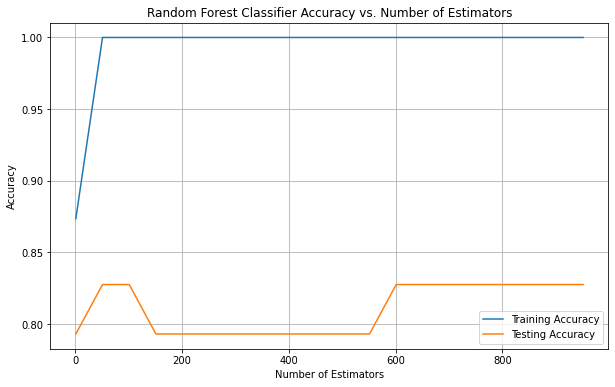

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

estimators_range = range(1, 1001, 50)
train_accuracy = []
test_accuracy = []

for n_estimators in estimators_range:
    # Create and train the RandomForestClassifier
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    model.fit(Xtrain, ytrain)
    
    # Predict on training and testing data
    y_train_pred = model.predict(Xtrain)
    y_test_pred = model.predict(Xtest)
    
    # Calculate accuracy scores
    train_accuracy.append(accuracy_score(ytrain, y_train_pred))
    test_accuracy.append(accuracy_score(ytest, y_test_pred))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_accuracy, label='Training Accuracy')
plt.plot(estimators_range, test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
k = 20  # Example: 5-fold cross-validation

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=175, max_depth=50, min_samples_split=10)

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-validation scores: [1.         0.66666667 0.83333333 1.         0.83333333 0.66666667
 0.5        0.66666667 0.66666667 0.66666667 0.66666667 0.33333333
 0.83333333 0.66666667 1.         0.5        1.         0.8
 1.         0.8       ]
Mean CV Score: 0.7550000000000001
Standard Deviation of CV Scores: 0.18507505984809997
